### Problem 2

#### (a)

Denote $\mu_i = (\mu_{A,i}, \mu_{B, i})^T$ and $z_i = (z_{A,i}, z_{B, i})^T$

$\mu_i \sim N(0, \Sigma)$, $z_i|\mu_i \sim N(\mu_i , I)$. Then we have
$$
\mu_i | z_i \sim N((\Sigma^{-1} + I)^{-1}z_i, (\Sigma^{-1} + I)^{-1})
$$

Here we just use the simplest point estimator to estimate $\Sigma$:
$$
\hat{\sigma}_A^2 = s_A^2 =\frac{1}{n-1}\sum_{i=1}^n (z_{A,i} - \bar{z}_A)^2-1\\
\hat{\sigma}_B^2 = s_B^2 = \frac{1}{n-1}\sum_{i=1}^n (z_{B,i} - \bar{z}_B)^2-1\\
\hat{\rho} = \frac{1}{(n-1)s_A s_B}\sum_{i=1}^n (z_{A,i} - \bar{z}_A)(z_{B,i} - \bar{z}_B)\\
$$

Then we have the James-Stein estimator:
$$
\hat{\mu}_i = (\hat{\Sigma}^{-1} + I)^{-1}z_i
$$

#### (b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy.random import default_rng
rng = default_rng(1)

In [8]:
n = 10
nrep = 100

from sklearn.metrics import mean_squared_error as mse
mse_a_my = np.zeros(nrep)
mse_b_my = np.zeros(nrep)
mse_a_js = np.zeros(nrep)
mse_b_js = np.zeros(nrep)
for rep in range(nrep):
    sigma_a2 = 1
    sigma_b2 = 2
    rho      = 0.5
    mean = [0, 0]
    cov = [[sigma_a2, rho*np.sqrt(sigma_a2*sigma_b2)],
           [rho*np.sqrt(sigma_a2*sigma_b2), sigma_b2]]
    mu_a, mu_b = rng.multivariate_normal(mean, cov, n).T
    z_a = mu_a + rng.standard_normal(n)
    z_b = mu_b + rng.standard_normal(n)

    Sigma_es = np.cov(np.array([z_a,z_b]), ddof=1)-np.identity(2)
    # print(Sigma_es)
    mu_a_es = np.zeros(n)
    mu_b_es = np.zeros(n)
    for i in range(n):
        mu_a_es[i], mu_b_es[i] = np.linalg.inv(np.linalg.inv(Sigma_es) + np.identity(2))@np.array([z_a[i],z_b[i]])

    Sigma_es = np.cov(np.array([z_a,z_b]), ddof=1)-np.identity(2)
    Sigma_es[0,1] = 0.0
    Sigma_es[1,0] = 0.0
    mu_a_JS = np.zeros(n)
    mu_b_JS = np.zeros(n)
    for i in range(n):
        mu_a_JS[i], mu_b_JS[i] = np.linalg.inv(np.linalg.inv(Sigma_es) + np.identity(2))@np.array([z_a[i],z_b[i]])
    
    mse_a_my[rep] = mse(mu_a_es, mu_a)
    mse_b_my[rep] = mse(mu_b_es, mu_b)
    mse_a_js[rep] = mse(mu_a_JS, mu_a)
    mse_b_js[rep] = mse(mu_b_JS, mu_b)

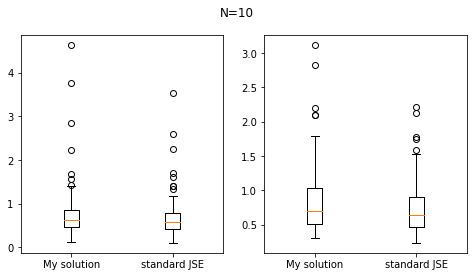

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].boxplot([mse_a_my, mse_a_js])
ax[0].set_xticklabels(['My solution', 'standard JSE'])
ax[1].boxplot([mse_b_my, mse_b_js])
ax[1].set_xticklabels(['My solution', 'standard JSE'])
plt.suptitle(f'N={n}')
plt.show()

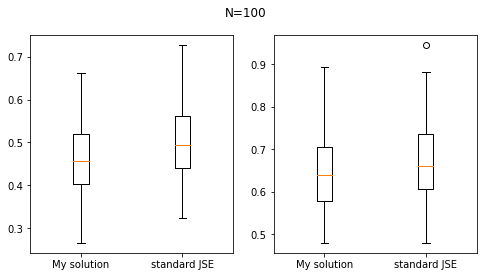

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].boxplot([mse_a_my, mse_a_js])
ax[0].set_xticklabels(['My solution', 'standard JSE'])
ax[1].boxplot([mse_b_my, mse_b_js])
ax[1].set_xticklabels(['My solution', 'standard JSE'])
plt.suptitle(f'N={n}')
plt.show()

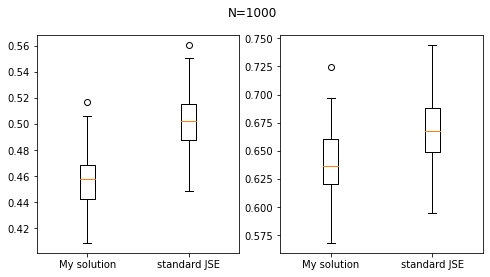

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].boxplot([mse_a_my, mse_a_js])
ax[0].set_xticklabels(['My solution', 'standard JSE'])
ax[1].boxplot([mse_b_my, mse_b_js])
ax[1].set_xticklabels(['My solution', 'standard JSE'])
plt.suptitle(f'N={n}')
plt.show()

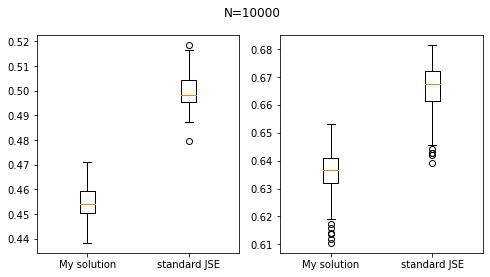

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].boxplot([mse_a_my, mse_a_js])
ax[0].set_xticklabels(['My solution', 'standard JSE'])
ax[1].boxplot([mse_b_my, mse_b_js])
ax[1].set_xticklabels(['My solution', 'standard JSE'])
plt.suptitle(f'N={n}')
plt.show()

#### (c)

From my simulation results, my estimator is alway better than the standard JSE without considering correlation effect.

Again, this problem illustrates that borrowing information from others can enhance you prediction ability.